In [1]:
#Install darts

In [1]:
!pip install darts
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 8.7 MB/s 
     |████████████████████████████████| 11.2 MB 22.7 MB/s 
     |████████████████████████████████| 1.4 MB 60.0 MB/s 
     |████████████████████████████████| 793 kB 43.2 MB/s 
     |████████████████████████████████| 44 kB 980 kB/s 
     |████████████████████████████████| 43 kB 949 kB/s 
     |████████████████████████████████| 585 kB 44.9 MB/s 
     |████████████████████████████████| 179 kB 25.9 MB/s 
     |████████████████████████████████| 9.8 MB 46.4 MB/s 
     |████████████████████████████████| 381 kB 58.5 MB/s 
     |████████████████████████████████| 944 kB 55.4 MB/s 
     |████████████████████████████████| 596 kB 54.9 MB/s 
     |████████████████████████████████| 140 kB 66.0 MB/s 
     |████████████████████████████████| 419 kB 54.9 MB/s 
     |████████████████████████████████| 1.1 MB 46.2 MB/s 
     |█████████████████████████████

In [2]:
#Set up proper environment

In [2]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 12.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 13.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2


In [ ]:
#Import packages

In [1]:
from darts import TimeSeries

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.utils import SeasonalityMode
import datetime

In [3]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    AutoARIMA,
    VARIMA,
    ExponentialSmoothing,
    Theta
)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import r2_score

In [4]:
#Import the dataset
#The dataset I'm using: df_exp

In [4]:
df = pd.read_csv('df_exp.csv')

In [3]:
#Set time as the index for time series

In [5]:
df['ts10'] = pd.to_datetime(df['ts10'])
df.set_index('ts10',inplace=True)
df.head()

,Unnamed: 0,pax_B1_dom,pax_B2_dom,pax_B3_dom,pax_B1_intl,pax_B2_intl,pax_B3_intl,total_doses,holiday,seats_tr,...,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight,Date,Hour,Minute,pax_C1,pax_C2,pax_C3
ts10,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,...,0,0,0,1,2021/1/1,0.0,0.0,0.0,0.0,2.0
2021-01-01 00:10:00,1,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,...,0,0,0,1,2021/1/1,0.0,10.0,0.0,0.0,4.0
2021-01-01 00:20:00,2,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,...,0,0,0,1,2021/1/1,0.0,20.0,0.0,0.0,7.0
2021-01-01 00:30:00,3,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,...,0,0,0,1,2021/1/1,0.0,30.0,0.0,0.0,1.0
2021-01-01 00:40:00,4,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,...,0,0,0,1,2021/1/1,0.0,40.0,1.0,0.0,2.0


In [5]:
#Fill the empty values with 0 for the modeling

In [24]:
df['pax_C3'] = df['pax_C3'].fillna(0.0)

In [26]:
df['pax_C1'] = df['pax_C1'].fillna(0.0)
df['pax_C2'] = df['pax_C2'].fillna(0.0)

In [6]:
#Choose Targets and Predictors(covariates)

In [27]:
targets = df.iloc[:,-3:]
covariates = df[['pax_B1_dom', 'pax_B2_dom', 'pax_B3_dom', 'pax_B1_intl', 'pax_B2_intl',
       'pax_B3_intl','total_doses','holiday','seats_tr','seats_lc']]

In [28]:
targets.columns

Index(['pax_C1', 'pax_C2', 'pax_C3'], dtype='object')

In [29]:
covariates.columns

Index(['pax_B1_dom', 'pax_B2_dom', 'pax_B3_dom', 'pax_B1_intl', 'pax_B2_intl',
       'pax_B3_intl', 'total_doses', 'holiday', 'seats_tr', 'seats_lc'],
      dtype='object')

In [30]:
cov = TimeSeries.from_dataframe(covariates)
tar = TimeSeries.from_dataframe(targets)

In [7]:
#Data transformation

In [31]:
sc_cov = Scaler()
cov_sc = sc_cov.fit_transform(cov)

sc_tar = Scaler()
tar_sc = sc_tar.fit_transform(tar)

In [8]:
#Train Test Split

In [32]:
cov_train, cov_test = cov_sc.split_before(pd.Timestamp(2021,12,1))
tar_train, tar_test = tar_sc.split_before(pd.Timestamp(2021,12,1))

In [9]:
#Plot the test dataset for passengers for concourse A as an example

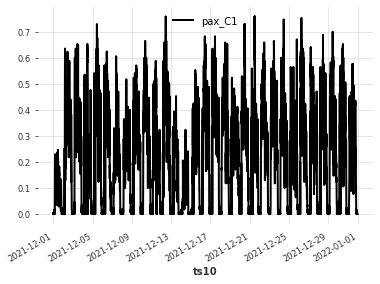

In [33]:
tar_test['pax_C1'].plot()

In [ ]:
#Initialize the LSTM model

In [34]:
model_cov = BlockRNNModel(
    model="LSTM",
    input_chunk_length=2016,
    output_chunk_length=1008,
    n_epochs=2
)

In [35]:
model_cov.fit(
    series=tar_train,
    past_covariates= cov_train,
    verbose=True,
)

2022-07-20 01:09:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 45073 samples.
2022-07-20 01:09:16 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-20 01:09:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-20 01:09:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-20 01:09:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-20 01:09:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-20 01:09:16 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 4.0 K 
4

Training: 0it [00:00, ?it/s]

In [ ]:
#Use model to predict 

In [36]:
pred = model_cov.predict(len(tar_test), series=tar_train, past_covariates=cov_sc)

Predicting: 1409it [00:00, ?it/s]

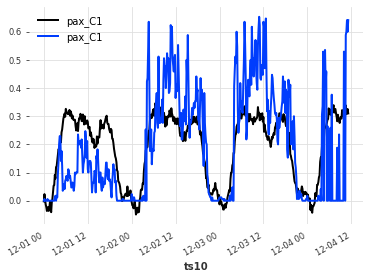

In [38]:
#Plot passenger passing concourse  A/B/C actual vs predicted for reference
pred['pax_C1'][:500].plot()
tar_test['pax_C1'][:500].plot()

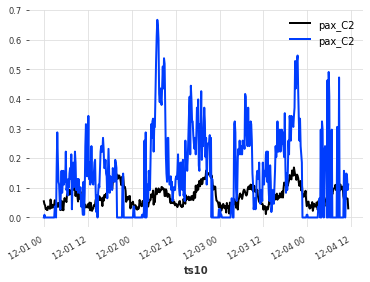

In [39]:
pred['pax_C2'][:500].plot()
tar_test['pax_C2'][:500].plot()

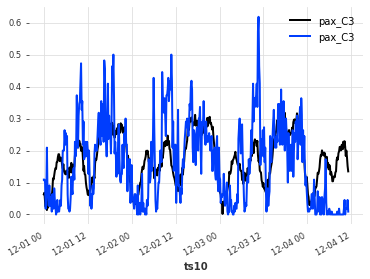

In [40]:
pred['pax_C3'][:500].plot()
tar_test['pax_C3'][:500].plot()